<h1 align=center><font size = 5>Comaparing Neighborhoods in Toronto and Manhattan, New York </font></h1>

Before we get the data and start exploring it, let's download all the dependencies that we will need.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<a id='item1'></a>

Read New York Data

In [2]:
#!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
with open('nyu_2451_34572-geojson.json') as json_data:
    newyork_data = json.load(json_data)
print('Data downloaded!')

Data downloaded!


Let's take a quick look at the data.

In [3]:
newyork_data

0,
    'borough': 'Queens',
    'bbox': [-73.79646462081593,
     40.71145964370482,
     -73.79646462081593,
     40.71145964370482]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.265',
   'geometry': {'type': 'Point',
    'coordinates': [-73.79671678028349, 40.73350025429757]},
   'geometry_name': 'geom',
   'properties': {'name': 'Utopia',
    'stacked': 1,
    'annoline1': 'Utopia',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Queens',
    'bbox': [-73.79671678028349,
     40.73350025429757,
     -73.79671678028349,
     40.73350025429757]}},
  {'type': 'Feature',
   'id': 'nyu_2451_34572.266',
   'geometry': {'type': 'Point',
    'coordinates': [-73.80486120040537, 40.73493618075478]},
   'geometry_name': 'geom',
   'properties': {'name': 'Pomonok',
    'stacked': 1,
    'annoline1': 'Pomonok',
    'annoline2': None,
    'annoline3': None,
    'annoangle': 0.0,
    'borough': 'Queens',
    'bbox': [-73.80486120040537,
     40.7349361807547

Notice how all the relevant data is in the *features* key, which is basically a list of the neighborhoods. So, let's define a new variable that includes this data.

In [4]:
neighborhoods_data = newyork_data['features']

Let's take a look at the first item in this list.

In [5]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

#### Tranform the data into a *pandas* dataframe

The next task is essentially transforming this data of nested Python dictionaries into a *pandas* dataframe. So let's start by creating an empty dataframe.

In [6]:
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.

In [7]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.

In [8]:
for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Quickly examine the resulting dataframe.

In [9]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


And make sure that the dataset has all 5 boroughs and 306 neighborhoods.

In [10]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>ny_explorer</em>, as shown below.

In [11]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


#### Create a map of New York with neighborhoods superimposed on top.

In [12]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [13]:
manhattan_data = neighborhoods[neighborhoods['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


Let's get the geographical coordinates of Manhattan.

In [14]:
address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


As we did with all of New York City, let's visualizat Manhattan the neighborhoods in it.

In [15]:
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

Next, we are going to start utilizing the Foursquare API to explore the neighborhoods and segment them.

#### Define Foursquare Credentials and Version

In [76]:
CLIENT_ID = '2O41KUOOGRDARBNSEJII0RHAB2BAMW1FJX4QJSOPNXSVYI2D' # your Foursquare ID
CLIENT_SECRET = 'JOQW0MPLLRVJCRYV0L5DTVDTBCHVMT1HDBUQBRE4BB0TPI1U' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2O41KUOOGRDARBNSEJII0RHAB2BAMW1FJX4QJSOPNXSVYI2D
CLIENT_SECRET:JOQW0MPLLRVJCRYV0L5DTVDTBCHVMT1HDBUQBRE4BB0TPI1U


#### Let's explore the first neighborhood in our dataframe.

Get the neighborhood's name.

In [77]:
manhattan_data.loc[0, 'Neighborhood']

'Marble Hill'

Get the neighborhood's latitude and longitude values.

In [78]:
neighborhood_latitude = manhattan_data.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = manhattan_data.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = manhattan_data.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Marble Hill are 40.87655077879964, -73.91065965862981.


#### Now, let's get the top 100 venues that are in Marble Hill within a radius of 500 meters.

First, let's create the GET request URL. Name your URL **url**.

In [79]:
radius = 500
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET,neighborhood_latitude,neighborhood_longitude,VERSION,radius, LIMIT)
url




'https://api.foursquare.com/v2/venues/explore?client_id=2O41KUOOGRDARBNSEJII0RHAB2BAMW1FJX4QJSOPNXSVYI2D&client_secret=JOQW0MPLLRVJCRYV0L5DTVDTBCHVMT1HDBUQBRE4BB0TPI1U&ll=40.87655077879964,-73.91065965862981&v=20180605&radius=500&limit=100'

Send the GET request and examine the resutls

In [20]:
results = requests.get(url).json()
results

},
       'categories': [{'id': '4bf58dd8d48988d1e0931735',
         'name': 'Coffee Shop',
         'pluralName': 'Coffee Shops',
         'shortName': 'Coffee Shop',
         'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/food/coffeeshop_',
          'suffix': '.png'},
         'primary': True}],
       'photos': {'count': 0, 'groups': []}},
      'referralId': 'e-0-57655be738faa66160da7527-8'},
     {'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4a725fa1f964a520f6da1fe3',
       'name': 'TCR The Club of Riverdale',
       'location': {'address': '2600 Netherland Ave',
        'lat': 40.8786283,
        'lng': -73.9145678,
        'labeledLatLngs': [{'label': 'display',
          'lat': 40.8786283,
          'lng': -73.9145678}],
        'distance': 402,
        'postalCode': '10463',
        'cc': 'US',
        'city': 'Bronx',
        's

From the Foursquare lab in the previous module, we know that all the information is in the *items* key. Before we proceed, let's borrow the **get_category_type** function from the Foursquare lab.

In [21]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a *pandas* dataframe.

And how many venues were returned by Foursquare?

In [22]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Arturo's,Pizza Place,40.874412,-73.910271
1,Bikram Yoga,Yoga Studio,40.876844,-73.906204
2,Tibbett Diner,Diner,40.880404,-73.908937
3,Starbucks,Coffee Shop,40.877531,-73.905582
4,Dunkin',Donut Shop,40.877136,-73.906666


In [23]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

25 venues were returned by Foursquare.


<a id='item2'></a>

## 2. Explore Neighborhoods in Manhattan

#### Let's create a function to repeat the same process to all the neighborhoods in Manhattan

In [24]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called *manhattan_venues*.

In [1]:
# type your answer here

manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )



NameError: name 'getNearbyVenues' is not defined

Double-click __here__ for the solution.
<!-- The correct answer is:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )
--> 

#### Let's check the size of the resulting dataframe

In [26]:
print(manhattan_venues.shape)
manhattan_venues.head()

NameError: name 'manhattan_venues' is not defined

Let's check how many venues were returned for each neighborhood

In [27]:
manhattan_venues.groupby('Neighborhood').count()

NameError: name 'manhattan_venues' is not defined

#### Let's find out how many unique categories can be curated from all the returned venues

In [28]:
print('There are {} uniques categories.'.format(len(manhattan_venues['Venue Category'].unique())))

NameError: name 'manhattan_venues' is not defined

<a id='item3'></a>

## 3. Analyze Each Neighborhood

In [29]:
# one hot encoding
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]

manhattan_onehot.head()

NameError: name 'manhattan_venues' is not defined

And let's examine the new dataframe size.

In [30]:
manhattan_onehot.shape

NameError: name 'manhattan_onehot' is not defined

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [31]:
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()
manhattan_grouped

NameError: name 'manhattan_onehot' is not defined

#### Let's confirm the new size

In [32]:
manhattan_grouped.shape

NameError: name 'manhattan_grouped' is not defined

In [33]:
tmp = manhattan_grouped[manhattan_grouped['Neighborhood'] == 'Yorkville'].T.reset_index()
tmp.iloc[1:]

NameError: name 'manhattan_grouped' is not defined

#### Let's print each neighborhood along with the top 5 most common venues

In [34]:
num_top_venues = 5

for hood in manhattan_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = manhattan_grouped[manhattan_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

NameError: name 'manhattan_grouped' is not defined

#### Let's put that into a *pandas* dataframe

First, let's write a function to sort the venues in descending order.

In [35]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [36]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

NameError: name 'manhattan_grouped' is not defined

<a id='item4'></a>

## 4. Cluster Neighborhoods

Run *k*-means to cluster the neighborhood into 5 clusters.

In [37]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

NameError: name 'manhattan_grouped' is not defined

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [38]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

manhattan_merged = manhattan_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
manhattan_merged = manhattan_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged.head() # check the last columns!

NameError: name 'kmeans' is not defined

Finally, let's visualize the resulting clusters

In [39]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged['Latitude'], manhattan_merged['Longitude'], manhattan_merged['Neighborhood'], manhattan_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

NameError: name 'manhattan_merged' is not defined

<a id='item5'></a>

## 5. Examine Clusters

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [40]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 2

In [41]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 3

In [42]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 4

In [43]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

#### Cluster 5

In [44]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]

NameError: name 'manhattan_merged' is not defined

## Toronto Data

In [45]:
url = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
toronto_data = pd.read_html(url)
toronto_df = pd.DataFrame(toronto_data[0])
toronto_df = toronto_df[toronto_df['Borough']!='Not assigned'].reset_index()
toronto_df.drop('index',axis=1,inplace=True)
toronto_df.head()

,Postal Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"


In [46]:
location_data = pd.read_csv('http://cocl.us/Geospatial_data')
location_data.head(6)

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476


In [47]:
toronto_merged = toronto_df
toronto_merged = toronto_merged.join(location_data.set_index('Postal Code'),on='Postal Code')
toronto_merged.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494


In [48]:
c=[]

for post,borough,neigh,lat,lng in zip(toronto_merged['Postal Code'],toronto_merged['Borough'], toronto_merged['Neighborhood'],toronto_merged['Latitude'],toronto_merged['Longitude']): 
    if 'Toronto' in borough:
        c.append([post,borough,neigh,lat,lng])

toronto_merged_df = pd.DataFrame(c)
toronto_merged_df.columns = ['Postal Code','Borough','Neighborhood','Latitude','Longitude']

toronto_merged_df.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
4,M4E,East Toronto,The Beaches,43.676357,-79.293031


In [49]:
address = 'Toronto, Ontario, Canada'
geolocator = Nominatim(user_agent = "toronto_explorer")
location = geolocator.geocode(address)
tor_lat = location.latitude
tor_lng = location.longitude

In [50]:
toronto_map = folium.Map(location=[tor_lat,tor_lng],zoom_start=11)

for brh,nbd,lat,lng in zip(toronto_merged_df['Borough'], toronto_merged_df['Neighborhood'],toronto_merged_df['Latitude'],toronto_merged_df['Longitude']):
    nb1 = nbd.split(",")[-1]
    nb1.replace(".",'')
    labels = '{},{}'.format(nb1,brh)
    folium.Marker(
                        [lat,lng],
                        #radius=5,
                        popup = labels,
                        #color = 'blue',
                        #fill = True,
                        #fill_color = 'blue',
                        #fill_opacity=0.7, 
                        #parse_html = False
                        ).add_to(toronto_map)

toronto_map


In [51]:
import requests
def get_nearby_venues(names,latitudes,longitudes,radius=500):
    venue_list=[]
    for name,lat,lng in zip(names,latitudes,longitudes):
        url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,             LIMIT)
        results = requests.get(url2).json()["response"]['groups'][0]['items']
        venue_list.append([(name,
                        lat,
                        lng,
                        v['venue']['name'],
                        v['venue']['location']['lat'],
                        v['venue']['location']['lng'],
                        v['venue']['categories'][0]['name']) for v in results])

        nearby_venues = pd.DataFrame([item for venue_list in venue_list for item in venue_list])
        nearby_venues.columns = ['Neighborhood','Neighborhood Latitude','Neighborhood                   Longitude','Venue', 'Venue Latitude','Venue Longitude','Venue Category']
    return nearby_venues

In [52]:
toronto_venues = get_nearby_venues(names = toronto_merged_df['Neighborhood'], 
                                    latitudes= toronto_merged_df['Latitude'],
                                    longitudes = toronto_merged_df['Longitude'])
print(toronto_venues.shape)
print('The total number of venues obtained is {}.'.format(toronto_venues.shape[0]))

(1636, 7)
The total number of venues obtained is 1636.


In [53]:
toronto_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Berczy Park,58,58,58,58,58,58
"Brockton, Parkdale Village, Exhibition Place",26,26,26,26,26,26
"Business reply mail Processing Centre, South Central Letter Processing Plant Toronto",16,16,16,16,16,16
"CN Tower, King and Spadina, Railway Lands, Harbourfront West, Bathurst Quay, South Niagara, Island airport",15,15,15,15,15,15
Central Bay Street,67,67,67,67,67,67
Christie,16,16,16,16,16,16
Church and Wellesley,77,77,77,77,77,77
"Commerce Court, Victoria Hotel",100,100,100,100,100,100
Davisville,37,37,37,37,37,37


In [54]:
print('There are {} unique venue categories in Toronto.'.format(len(toronto_venues['Venue Category'].unique())))

There are 232 unique venue categories in Toronto.


In [55]:
toronto_new = pd.get_dummies(toronto_venues[['Venue Category']], prefix="",prefix_sep=" ")
toronto_new['Neighborhood'] = toronto_venues['Neighborhood']
column_list = [toronto_new.columns[-1]] + list(toronto_new.columns[:-1])
toronto_new = toronto_new[column_list]
toronto_new.shape

(1636, 233)

In [56]:
toronto_grouped = toronto_new.groupby('Neighborhood').mean().reset_index()
#toronto_grouped = toronto_new.groupby(['Neighborhood'],as_index=False).mean()
print(toronto_grouped.shape)
toronto_grouped.head()

(39, 233)


,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017241,0.000000,0.0,0.0,0.0000,0.017241,0.0,0.017241,0.034483,0.0,0.000000,0.0,0.017241,0.017241,0.0,0.034483,0.0,0.0,0.017241,0.0,0.000000,0.0,0.0,0.0,0.017241,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.000000,0.0,0.051724,0.086207,0.0,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.000000,0.0,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.000000,0.0,0.0,0.0,0.000000,0.017241,0.0,0.0,0.0,0.000000,0.034483,0.0000,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.017241,0.017241,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [57]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [58]:
num_top_venues = 6

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,Berczy Park,Coffee Shop,Cocktail Bar,Bakery,Cheese Shop,Café,Restaurant
1,"Brockton, Parkdale Village, Exhibition Place",Café,Bakery,Nightclub,Performing Arts Venue,Coffee Shop,Breakfast Spot
2,"Business reply mail Processing Centre, South C...",Yoga Studio,Auto Workshop,Park,Comic Shop,Pizza Place,Recording Studio
3,"CN Tower, King and Spadina, Railway Lands, Har...",Airport Lounge,Airport Service,Airport Terminal,Harbor / Marina,Sculpture Garden,Airport Food Court
4,Central Bay Street,Coffee Shop,Italian Restaurant,Sandwich Place,Café,Bar,Japanese Restaurant


In [59]:
from sklearn.cluster import KMeans
k_clusters = 4
toronto_grouped_cluster = toronto_grouped.drop('Neighborhood',axis=1)
kmn = KMeans(n_clusters=k_clusters,random_state=0)

In [60]:
kmn.fit(toronto_grouped_cluster)
kmn.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 2, 1,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

In [61]:
neighborhoods_venues_sorted.insert(0,'Cluster',kmn.labels_)

toronto_final = toronto_merged_df
toronto_final = toronto_final.join(neighborhoods_venues_sorted.set_index('Neighborhood'),on='Neighborhood')
toronto_final.head()

,Postal Code,Borough,Neighborhood,Latitude,Longitude,Cluster,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636,1,Coffee Shop,Bakery,Park,Breakfast Spot,Restaurant,Café
1,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government",43.662301,-79.389494,1,Coffee Shop,Diner,Yoga Studio,Music Venue,Beer Bar,Smoothie Shop
2,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937,1,Coffee Shop,Clothing Store,Japanese Restaurant,Café,Cosmetics Shop,Bubble Tea Shop
3,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418,1,Café,Coffee Shop,Restaurant,Cocktail Bar,Cosmetics Shop,American Restaurant
4,M4E,East Toronto,The Beaches,43.676357,-79.293031,0,Neighborhood,Health Food Store,Trail,Pub,Yoga Studio,Dog Run


In [62]:
toronto_cluster = folium.Map(location=[tor_lat,tor_lng],zoom_start=11)

# set color scheme for the clusters
x = np.arange(k_clusters)
ys = [i + x + (i*x)**2 for i in range(k_clusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_final['Latitude'], toronto_final['Longitude'], toronto_final['Neighborhood'], toronto_final['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(toronto_cluster)

toronto_cluster

## Compare New York and Toronto

In [63]:
toronto_grouped.head()

,Neighborhood,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Home Service,Hookah Bar,Hospital,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Mac & Cheese Joint,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Yoga Studio
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.017241,0.000000,0.0,0.0,0.0000,0.017241,0.0,0.017241,0.034483,0.0,0.000000,0.0,0.017241,0.017241,0.0,0.034483,0.0,0.0,0.017241,0.0,0.000000,0.0,0.0,0.0,0.017241,0.0000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.034483,0.0,0.0,0.0,0.000000,0.0,0.051724,0.086207,0.0,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.000000,0.0,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.017241,0.000000,0.017241,0.000000,0.0,0.0,0.0,0.000000,0.017241,0.0,0.0,0.0,0.000000,0.034483,0.0000,0.0,0.0,0.017241,0.0,0.0,0.0,0.0,0.017241,0.017241,0.000000,0.0,0.0,0.000000,0.0,0.0000,0.0000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0

In [64]:
manhattan_grouped.head()

NameError: name 'manhattan_grouped' is not defined

In [65]:
toronto_columns = []
for col in toronto_grouped.columns:
    toronto_columns.append(col.strip())
    
toronto_grouped.columns = toronto_columns

In [66]:
features = []
for col in manhattan_grouped.columns:
    if col in toronto_grouped.columns:
        features.append(col)
len(features)

manhattan_compare = manhattan_grouped[features]
toronto_compare = toronto_grouped[features]

NameError: name 'manhattan_grouped' is not defined

In [67]:
import seaborn as sns
print('There are {} common venues between Manhattan and Toronto. So these areas are very similar'.format(len(features)))



Bad key "text.kerning_factor" on line 4 in
C:\Users\Sorcerer\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution
There are 0 common venues between Manhattan and Toronto. So these areas are very similar


## Let's also compare demographics between these 2 cities

In [68]:
url4 = "https://en.wikipedia.org/wiki/Boroughs_of_New_York_City"
dfny = pd.read_html(url4)[0]
dfn = pd.DataFrame(dfny)

dfn.drop(dfn.index[5:], inplace=True)
dfn.head()

New York City's five boroughsvte                               \
                      Jurisdiction                   Population   
                           Borough    County Estimate (2019)[3]   
0                        The Bronx     Bronx            1418207   
1                         Brooklyn     Kings            2559903   
2                        Manhattan  New York            1628706   
3                           Queens    Queens            2253858   
4                    Staten Island  Richmond             476143   

                                                                \
  Gross Domestic Product                    Land area            
        billions(US$)[4] per capita(US$) square miles squarekm   
0                 42.695           30100        42.10   109.04   
1                 91.559           35800        70.82   183.42   
2                600.244          368500        22.83    59.13   
3                 93.310           41400       108.53   281.09   
4                 14.514           30500        58.37   151.18   

                                 
           Density               
  persons / sq. mi persons /km2  
0            33867        13006  
1            36147        13957  
2            71341        27544  
3            20767         8018  
4             8157         3150

In [69]:
dfn.loc[:]["New York City's five boroughsvte"]["Jurisdiction"]["Borough"]

0        The Bronx
1         Brooklyn
2        Manhattan
3           Queens
4    Staten Island
Name: Borough, dtype: object

In [70]:
dfn.loc[:]["New York City's five boroughsvte"]['Density']['persons /km2'].astype('int')

0    13006
1    13957
2    27544
3     8018
4     3150
Name: persons /km2, dtype: int32

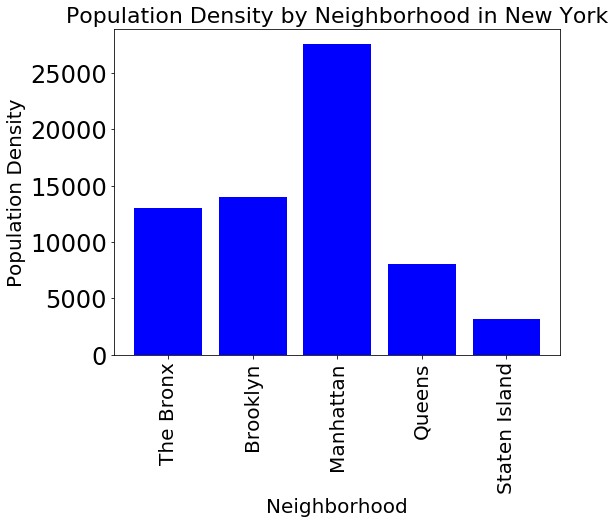

In [71]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.bar(dfn.loc[:]["New York City's five boroughsvte"]["Jurisdiction"]["Borough"], dfn.loc[:]["New York City's five boroughsvte"]['Density']['persons /km2'].astype('int'), color = 'blue')
plt.title("Population Density by Neighborhood in New York", fontsize = '22')
plt.xlabel('Neighborhood', fontsize = '20')
plt.ylabel('Population Density', fontsize = '20')
plt.xticks(fontsize='20', rotation ='90')
plt.yticks(fontsize='24')
plt.savefig('pdny.jpg')
plt.show()

In [72]:
url3 = 'https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods'
dft = pd.read_html(url3)[1]
dft = pd.DataFrame(dft)
dft = dft.iloc[1:]
dft.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN
5,Amesbury,NY,"0280.00, 0281.01, 0281.02",17318,3.51,4934,1.1,27546,16.4,19.7,Spanish (6.1%),06.1% Spanish,NaN


In [73]:
dft_2 = dft.groupby('FM',as_index=False).sum()

In [74]:
dft_2['Density (people/km2)'] = dft_2['Population']/dft_2['Land area (km2)']
dft_2.head()

,FM,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Map
0,E,313772,115.09,2726.318533,9.0,1076405,289.6,341.4,0.0
1,EY,112054,21.05,5323.230404,-4.6,327624,95.8,115.1,0.0
2,NY,621068,173.44,3580.880996,213.8,2175597,527.0,630.1,0.0
3,OCoT,624910,93.43,6688.536873,433.6,3738194,1192.7,1487.9,0.0
4,S,600715,182.23,3296.466004,182.2,885045,409.6,337.6,0.0


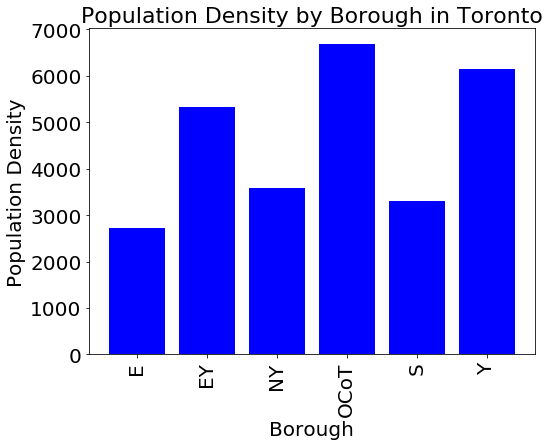

In [75]:

plt.figure(figsize = (8,6))
plt.bar(dft_2['FM'], dft_2['Density (people/km2)'], color = 'blue')
plt.title("Population Density by Borough in Toronto", fontsize = '22')
plt.xlabel('Borough', fontsize = '20')
plt.ylabel('Population Density', fontsize = '20')
plt.xticks(fontsize='20', rotation ='90')
plt.yticks(fontsize='20')
plt.savefig('pdtor.jpg')
plt.show()

#dft.columns


## Plot the population density of New York and Toronto together

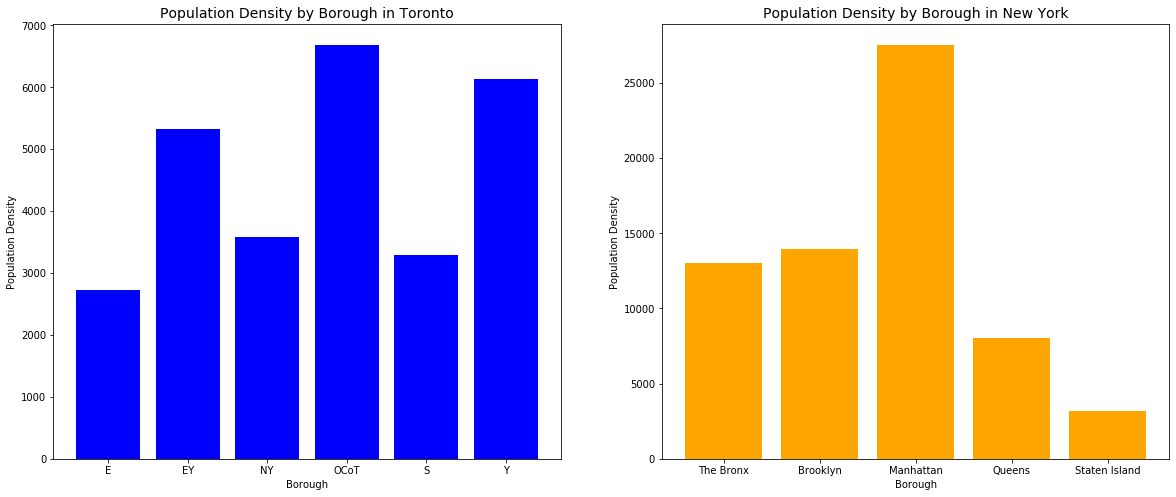

In [487]:
fig = plt.figure(figsize=(20,8))
ax0 = fig.add_subplot(1,2,1)
ax1 = fig.add_subplot(1,2,2)

ax0.bar(dft_2['FM'], dft_2['Density (people/km2)'], color = 'blue')
ax0.set_title("Population Density by Borough in Toronto", fontsize = '14')
ax0.set_xlabel('Borough')
ax0.set_ylabel('Population Density')

ax1.bar(dfn.loc[:]["New York City's five boroughsvte"]["Jurisdiction"]["Borough"], dfn.loc[:]["New York City's five boroughsvte"]['Density']['persons /km2'].astype('int'),color = 'orange')
ax1.set_title("Population Density by Borough in New York", fontsize = '14')
ax1.set_xlabel('Borough')
ax1.set_ylabel('Population Density')
plt.show()